In [44]:
import scipy.io as sio

PATH_QUAD = './../Results/Burgers/quad/'
PATH_QUAD_OPINF = './../Results/Burgers/quad_opinf/'

In [45]:
data_nonlinear_ae = sio.loadmat(PATH_QUAD + 'simulation_error_order_256_polished_AE.mat')
data_opinf_linearproj = sio.loadmat(PATH_QUAD_OPINF + 'simulation_error_order_4_linearproj_quadOpinf.mat')
data_opinf_quadproj = sio.loadmat(PATH_QUAD_OPINF + 'simulation_error_order_4_quadproj_quadOpinf.mat')

In [46]:
np.concatenate((data_nonlinear_ae['errors'], data_nonlinear_ae['errors']), axis=0).shape

(2, 4)

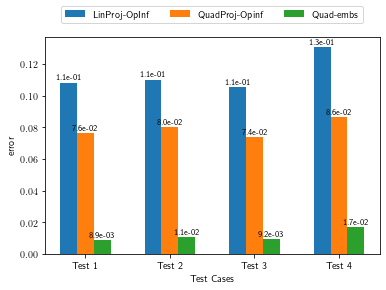

In [47]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('text', usetex=True)

fig, ax = plt.subplots(1,1, figsize=(6,4))
# Sample data (replace with your actual data)
methods = [r'LinProj-OpInf', r'QuadProj-Opinf', r'Quad-embs']
test_cases = [r'Test 1', r'Test 2', r'Test 3', r'Test 4']

# Replace these values with your actual numeric data
# data = np.array([
#     [value11, value12, value13, value14],  # Method 1
#     [value21, value22, value23, value24],  # Method 2
#     [value31, value32, value33, value34]   # Method 3
# ])
data = np.concatenate((data_opinf_linearproj['errors'], 
                       data_opinf_quadproj['errors'], 
                       data_nonlinear_ae['errors'],), axis=0)

# Set up the bar plot
bar_width = 0.2
bar_positions = np.arange(len(test_cases))

# Plot each method
for i, method in enumerate(methods):
    bars = ax.bar(bar_positions + i * bar_width, data[i, :], bar_width, label=method)
    
    # Add labels on each bar
    for bar, value in zip(bars, data[i, :]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.001, 
                f'{value:.1e}', ha='center', va='bottom', rotation=0, fontsize=8, fontname='serif')

# Add labels and title
ax.set_xlabel('Test Cases')
ax.set_ylabel('error')
ax.set_xticks(bar_positions + bar_width * (len(methods) - 1) / 2, test_cases)
ax.legend(loc='center', bbox_to_anchor=(0.5, 1.1), ncol = 3)

# Show the plot
plt.show()
fig.savefig(PATH_QUAD + '/../' + "test_comparions.png", dpi=300)
fig.savefig(PATH_QUAD + '/../' + "test_comparions.pdf")